<a href="https://colab.research.google.com/github/krishnaa30000/Iris-Flower-Classification-Projectt/blob/main/Plate_no_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [17]:
! pip install easyocr
! pip install imutils
! pip install opencv-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
from google.colab.patches import cv2_imshow

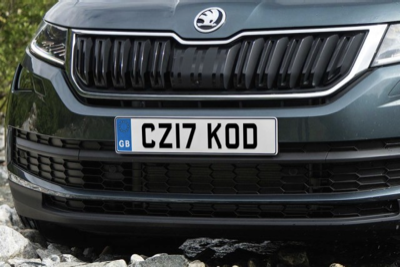

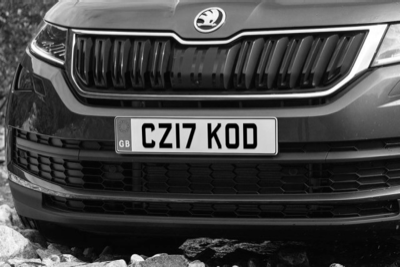

In [62]:
img=cv2.imread('/content/Cars109.png')


type(img)
cv2_imshow(img)

gray_scale_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

cv2_imshow(gray_scale_img)

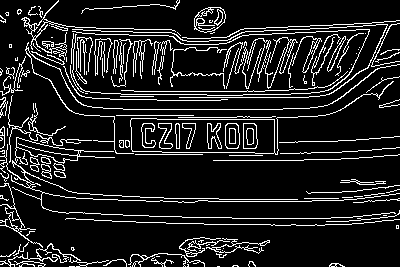

In [63]:
bfilter=cv2.bilateralFilter(gray_scale_img, 11, 17,17)
edged=cv2.Canny(bfilter,30,200)
cv2_imshow(edged)

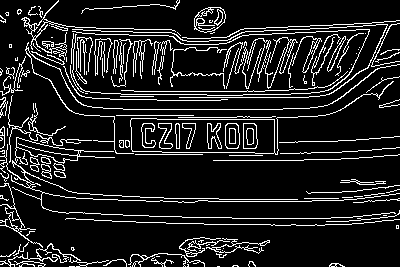

In [64]:
bfilter=cv2.bilateralFilter(gray_scale_img, 11, 17,17)
edged=cv2.Canny(bfilter,30,200)
cv2_imshow(edged)

In [65]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)
print(contours)
type(contours)
len(contours)

[array([[[392,  81]],

       [[389,  84]],

       [[388,  84]],

       [[383,  89]],

       [[383,  90]],

       [[382,  91]],

       [[382,  92]],

       [[379,  95]],

       [[379,  96]],

       [[378,  97]],

       [[377,  96]],

       [[377,  94]],

       [[376,  93]],

       [[375,  94]],

       [[373,  94]],

       [[372,  93]],

       [[371,  93]],

       [[370,  94]],

       [[363,  94]],

       [[362,  95]],

       [[361,  95]],

       [[359,  97]],

       [[358,  97]],

       [[357,  98]],

       [[356,  98]],

       [[353, 101]],

       [[352, 101]],

       [[350, 103]],

       [[349, 103]],

       [[347, 105]],

       [[346, 105]],

       [[343, 108]],

       [[342, 108]],

       [[341, 109]],

       [[340, 109]],

       [[339, 110]],

       [[338, 110]],

       [[337, 111]],

       [[336, 111]],

       [[335, 112]],

       [[333, 112]],

       [[332, 113]],

       [[330, 113]],

       [[329, 114]],

       [[326, 114]],

       [[

255

In [66]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location=approx
    break




In [67]:
 print(location)

[[[130 120]]

 [[273 119]]

 [[274 152]]

 [[133 151]]]


In [68]:
mask=np.zeros(gray_scale_img.shape , np.uint8)
new_image=cv2.drawContours(mask,[location],0 , 255,-1)
new_image=cv2.bitwise_and(img, img, mask=mask)


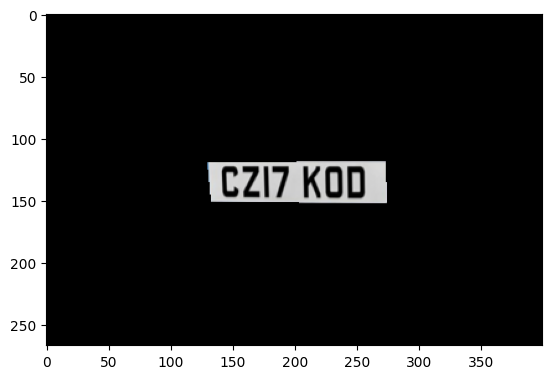

In [69]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [70]:
(x,y)=np.where(mask== 255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image=gray_scale_img[x1:x2+1, y1:y2+1]

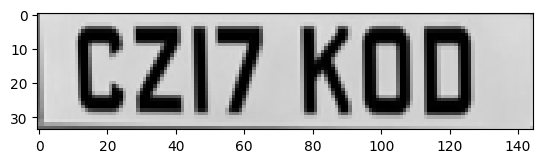

In [71]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [72]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[7, 1], [133, 1], [133, 34], [7, 34]], 'Czi7 kod', 0.45638798204824554)]